![aaron judge](judge_wide.jpg)

This is Aaron Judge. Judge is one of the physically largest players in Major League Baseball standing 6 feet 7 inches (2.01 m) tall and weighing 282 pounds (128 kg). He also hit one of the hardest home runs ever recorded. How do we know this? Statcast.

Statcast is a state-of-the-art tracking system that uses high-resolution cameras and radar equipment to measure the precise location and movement of baseballs and baseball players. Introduced in 2015 to all 30 major league ballparks, Statcast data is revolutionizing the game. Teams are engaging in an "arms race" of data analysis, hiring analysts left and right in an attempt to gain an edge over their competition.

In this project, you're going to wrangle, analyze, and visualize Statcast historical data to compare Mr. Judge and another (extremely large) teammate of his, Giancaro Stanton. They are similar in a lot of ways, one being that they hit a lot of home runs. Stanton and Judge led baseball in home runs in 2017, with 59 and 52, respectively. These are exceptional totals - the player in third "only" had 45 home runs.

Stanton and Judge are also different in many ways. Let's find out how they compare!

**The Data**

There are two CSV files, `judge.csv` and `stanton.csv`, both of which contain Statcast data for 2015-2017. Each row represents one pitch thrown to a batter. 

**Custom Functions**

Two functions have also been provided for you to visualize home rome zones
- `assign_x_coord`: Assigns an x-coordinate to Statcast's strike zone numbers.
- `assign_y_coord`: Assigns a y-coordinate to Statcast's strike zone numbers.

![](zone.png)

In [74]:
# Run this cell to begin
# Import the necessary packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Aaron Judge's Statcast data
judge = pd.read_csv('judge.csv', parse_dates=['game_date'])

# Load Giancarlo Stanton's Statcast data
stanton = pd.read_csv('stanton.csv', parse_dates=['game_date'])

# Display all columns (pandas will collapse some columns if we don't set this option)
pd.set_option('display.max_columns', None)

# Custom Functions
def assign_x_coord(row):
    """
    Assigns an x-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Left third of strike zone
    if row.zone in [1, 4, 7]:
        return 1
    # Middle third of strike zone
    if row.zone in [2, 5, 8]:
        return 2
    # Right third of strike zone
    if row.zone in [3, 6, 9]:
        return 3
    
def assign_y_coord(row):
    """
    Assigns a y-coordinate to Statcast's strike zone numbers. Zones 11, 12, 13,
    and 14 are ignored for plotting simplicity.
    """
    # Upper third of strike zone
    if row.zone in [1, 2, 3]:
        return 3
    # Middle third of strike zone
    if row.zone in [4, 5, 6]:
        return 2
    # Lower third of strike zone
    if row.zone in [7, 8, 9]:
        return 1
    
# Display the last five rows of the Aaron Judge file
display(judge.tail(), stanton.tail())

,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
3431,CH,2016-08-13,85.6,-1.9659,5.9113,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,0,2016,-0.379108,0.370567,0.739,1.442,NaN,NaN,NaN,0,5,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_144259,6.960,-124.371,-4.756,-2.821,23.634,-30.220,3.93,1.82,NaN,NaN,NaN,84.459,1552.0,5.683,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8144,0.00,0.000,NaN,NaN,NaN,NaN,NaN,36,1
3432,CH,2016-08-13,87.6,-1.9318,5.9349,Aaron Judge,592450,542882,home_run,hit_into_play_score,NaN,NaN,NaN,NaN,4.0,Aaron Judge homers (1) on a fly ball to center...,R,R,R,NYY,TB,X,NaN,fly_ball,1,2,2016,-0.295608,0.320400,-0.419,3.273,NaN,NaN,NaN,2,2,Bot,130.45,14.58,NaN,NaN,571912.0,NaN,160813_135833,4.287,-127.452,-0.882,-1.972,24.694,-30.705,4.01,1.82,446.0,108.8,27.410,86.412,1947.0,5.691,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.8064,0.98,1.937,2.0,1.0,0.0,3.0,6.0,14,4
3433,CH,2016-08-13,87.2,-2.0285,5.8656,Aaron Judge,592450,542882,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,NYY,TB,B,NaN,NaN,0,2,2016,-0.668575,0.198567,0.561,0.960,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135815,7.491,-126.665,-5.862,-6.393,21.952,-32.121,4.01,1.82,NaN,NaN,NaN,86.368,1761.0,5.721,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.7770,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,3
3434,CU,2016-08-13,79.7,-1.7108,6.1926,Aaron Judge,592450,542882,NaN,foul,NaN,NaN,NaN,NaN,4.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,1,2016,0.397442,-0.614133,-0.803,2.742,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135752,1.254,-116.062,0.439,5.184,21.328,-39.866,4.01,1.82,9.0,55.8,-24.973,77.723,2640.0,5.022,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,55.4756,0.00,0.000,NaN,NaN,NaN,NaN,1.0,14,2
3435,FF,2016-08-13,93.2,-1.8476,6.0063,Aaron Judge,592450,542882,NaN,called_strike,NaN,NaN,NaN,NaN,8.0,NaN,R,R,R,NYY,TB,S,NaN,NaN,0,0,2016,-0.823050,1.623300,-0.273,2.471,NaN,NaN,NaN,2,2,Bot,NaN,NaN,NaN,NaN,571912.0,NaN,160813_135736,5.994,-135.497,-6.736,-9.360,26.782,-13.446,4.01,1.82,NaN,NaN,NaN,92.696,2271.0,6.068,448611,542882.0,571912.0,543543.0,523253.0,446334.0,622110.0,545338.0,595281.0,543484.0,54.4299,0.00,0.000,NaN,NaN,NaN,NaN,NaN,14,1


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,hc_x,hc_y,tfs_deprecated,tfs_zulu_deprecated,pos2_person_id,umpire,sv_id,vx0,vy0,vz0,ax,ay,az,sz_top,sz_bot,hit_distance_sc,launch_speed,launch_angle,effective_speed,release_spin_rate,release_extension,game_pk,pos1_person_id,pos2_person_id.1,pos3_person_id,pos4_person_id,pos5_person_id,pos6_person_id,pos7_person_id,pos8_person_id,pos9_person_id,release_pos_y,estimated_ba_using_speedangle,estimated_woba_using_speedangle,woba_value,woba_denom,babip_value,iso_value,launch_speed_angle,at_bat_number,pitch_number
5893,SL,2015-04-06,79.3,-2.8200,5.9933,Giancarlo Stanton,519317,527054,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,MIA,ATL,B,NaN,NaN,2,2,2015,0.711958,0.019400,0.590,1.134,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,542194.0,NaN,150406_203504,6.164,-115.196,-1.903,8.069,22.957,-33.778,3.54,1.62,NaN,NaN,NaN,77.581,2684.0,5.477,413650,527054.0,542194.0,518692.0,607054.0,430948.0,592743.0,430637.0,458913.0,455976.0,55.0197,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8,5
5894,SL,2015-04-06,79.8,-2.6602,6.0066,Giancarlo Stanton,519317,527054,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,MIA,ATL,B,NaN,NaN,1,2,2015,0.873392,-0.202767,1.469,1.258,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,542194.0,NaN,NaN,7.451,-115.977,-1.063,9.507,28.101,-35.799,3.55,1.63,NaN,NaN,NaN,77.795,2756.0,5.766,413650,527054.0,542194.0,518692.0,607054.0,430948.0,592743.0,430637.0,458913.0,455976.0,54.7310,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8,4
5895,FF,2015-04-06,94.2,NaN,NaN,Giancarlo Stanton,519317,527054,NaN,called_strike,NaN,NaN,NaN,NaN,9.0,NaN,R,R,R,MIA,ATL,S,NaN,NaN,1,1,2015,-0.926033,1.621867,0.460,2.028,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.060,-136.568,-5.859,-10.691,32.983,-13.567,3.75,1.67,NaN,NaN,NaN,NaN,NaN,NaN,413650,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8,3
5896,SL,2015-04-06,81.5,-2.7187,5.7605,Giancarlo Stanton,519317,527054,NaN,ball,NaN,NaN,NaN,NaN,14.0,NaN,R,R,R,MIA,ATL,B,NaN,NaN,0,1,2015,0.057875,0.307500,1.138,1.419,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,542194.0,NaN,150406_162838,8.457,-118.332,-2.159,1.898,23.644,-31.048,3.66,1.67,NaN,NaN,NaN,79.737,1381.0,5.516,413650,527054.0,542194.0,518692.0,607054.0,430948.0,592743.0,430637.0,458913.0,455976.0,54.9803,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8,2
5897,FT,2015-04-06,90.1,-2.5953,6.1202,Giancarlo Stanton,519317,527054,NaN,called_strike,NaN,NaN,NaN,NaN,13.0,NaN,R,R,R,MIA,ATL,S,NaN,NaN,0,0,2015,-1.503575,0.922400,-1.218,2.561,NaN,NaN,NaN,2,1,Bot,NaN,NaN,NaN,NaN,542194.0,NaN,150406_162805,7.277,-131.003,-2.446,-16.930,31.043,-23.450,3.62,1.67,NaN,NaN,NaN,89.049,2027.0,6.060,413650,527054.0,542194.0,518692.0,607054.0,430948.0,592743.0,430637.0,458913.0,455976.0,54.4366,0.0,0.0,NaN,NaN,NaN,NaN,NaN,8,1


In [75]:
# How many of each event did Judge and Stanton have in 2017?
stanton_events_2017 = stanton[stanton['game_date'].dt.year==2017].groupby('events').agg(count=('events','count')).sort_values('count', ascending=False)

judge_events_2017 =  judge[judge['game_date'].dt.year==2017].groupby('events').agg(count=('events','count')).sort_values('count', ascending=False)

stanton_events_2017 = stanton_events_2017['count']
judge_events_2017 = judge_events_2017['count']

display(stanton_events_2017.head(), judge_events_2017.head())
print(type(stanton_events_2017))

events
field_out    239
strikeout    161
single        77
walk          72
home_run      59
Name: count, dtype: int64

events
strikeout    207
field_out    146
walk         116
single        75
home_run      52
Name: count, dtype: int64

<class 'pandas.core.series.Series'>


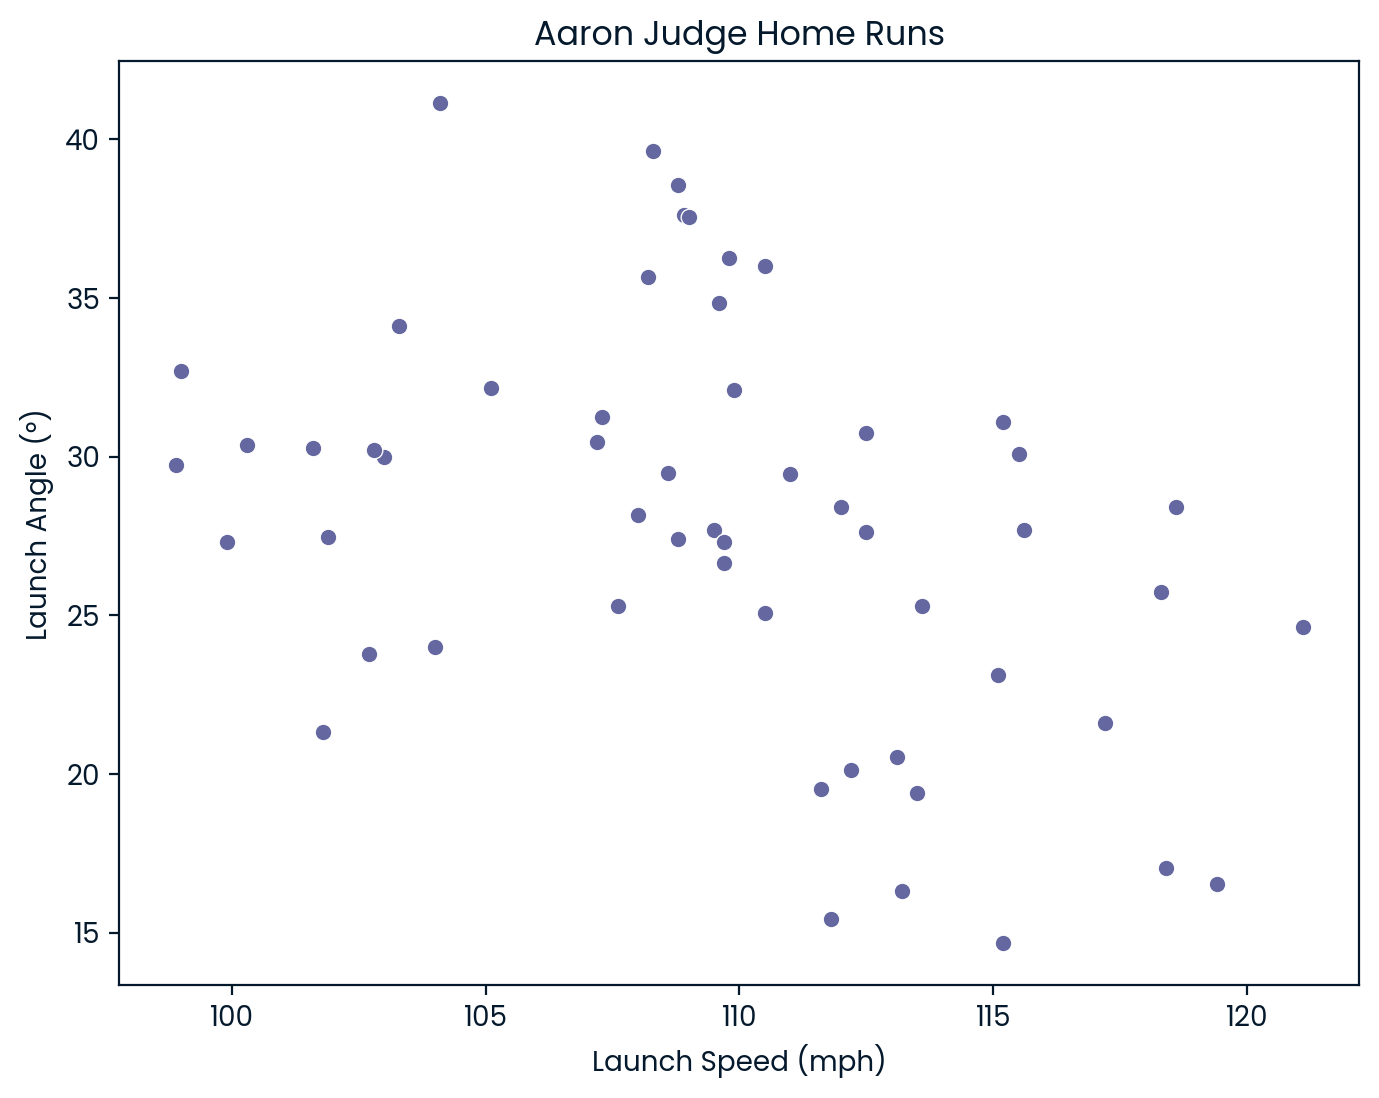

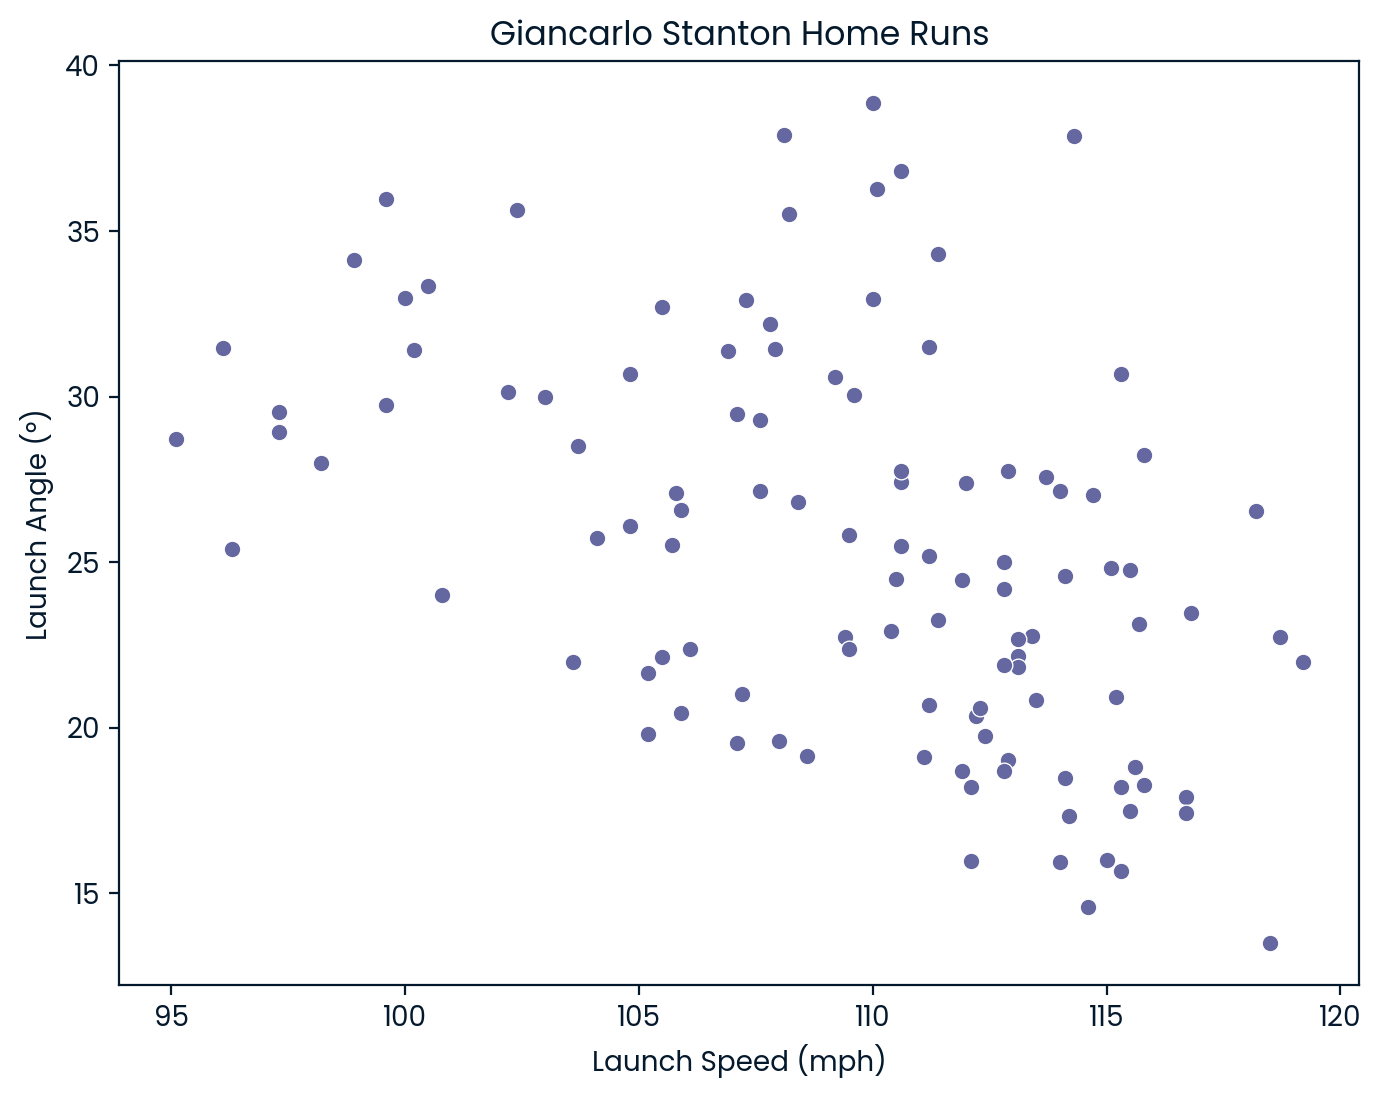

player_hr =  Stanton


In [76]:
# Which player hit home runs slightly lower and harder?

# Create a plot for Aaron Judge with launch_speed on the x-axis and launch_angle on the y-axis
fig1, ax1 = plt.subplots(figsize=(8,6))
sns.scatterplot(data=judge[judge['events']=='home_run'], x='launch_speed', y='launch_angle', ax=ax1)
ax1.set_title('Aaron Judge Home Runs')
ax1.set_xlabel('Launch Speed (mph)')
ax1.set_ylabel('Launch Angle (°)')

# Create a plot for Giancarlo Stanton with launch_speed on the x-axis and launch_angle on the y-axis
fig2, ax2 = plt.subplots(figsize=(8,6))
sns.scatterplot(data=stanton[stanton['events']=='home_run'], x='launch_speed', y='launch_angle', ax=ax2)
ax2.set_title('Giancarlo Stanton Home Runs')
ax2.set_xlabel('Launch Speed (mph)')
ax2.set_ylabel('Launch Angle (°)')
plt.show()

# Answer
player_hr = "Stanton"
print("player_hr = ", player_hr)

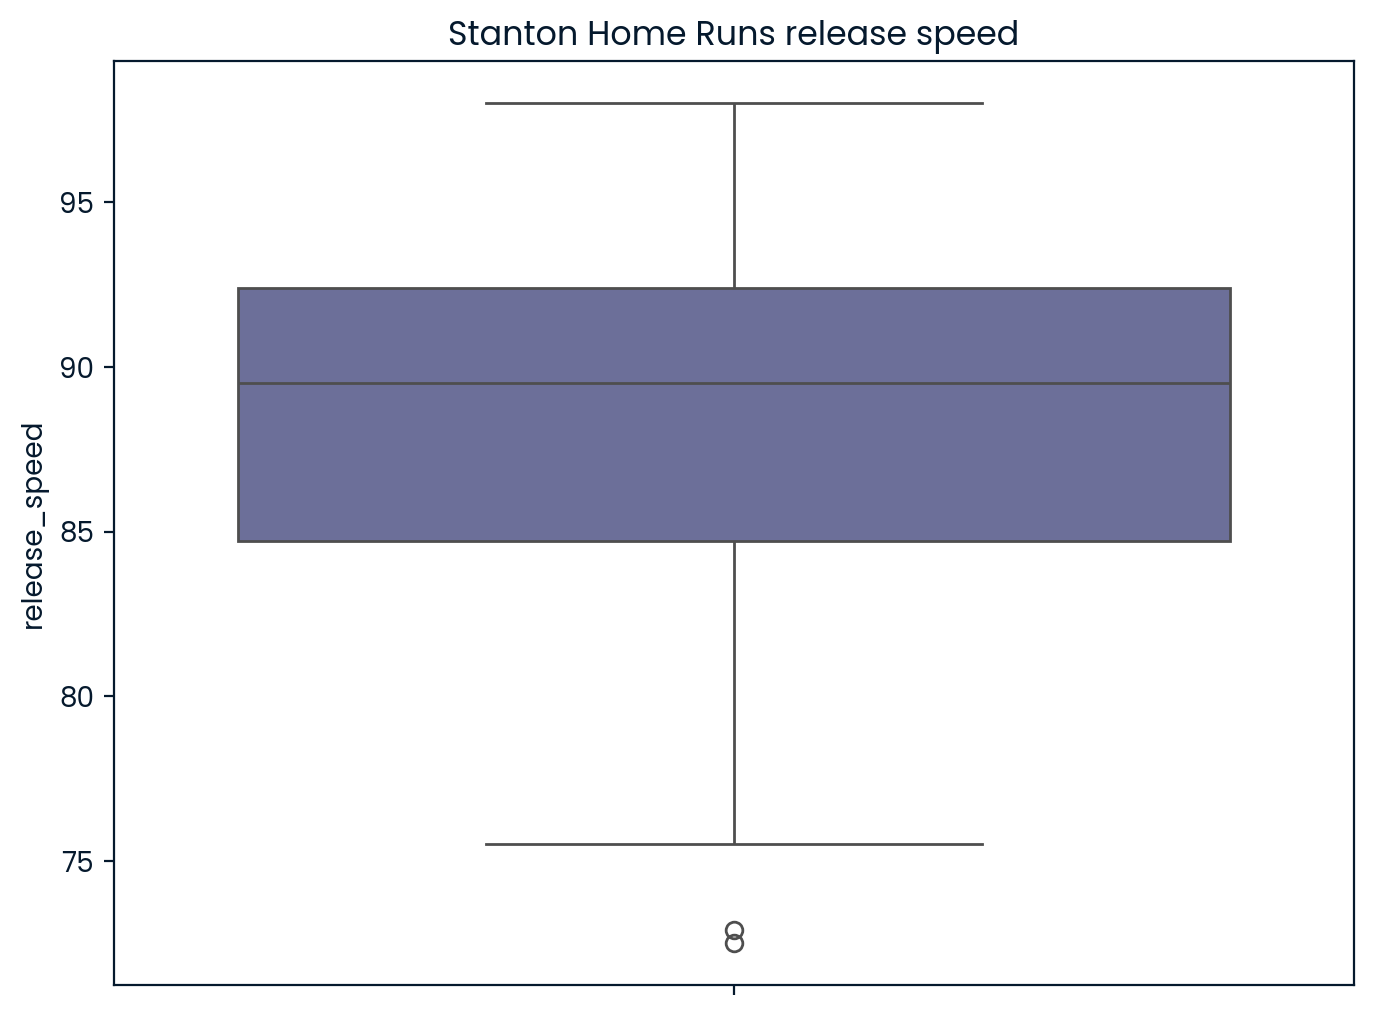

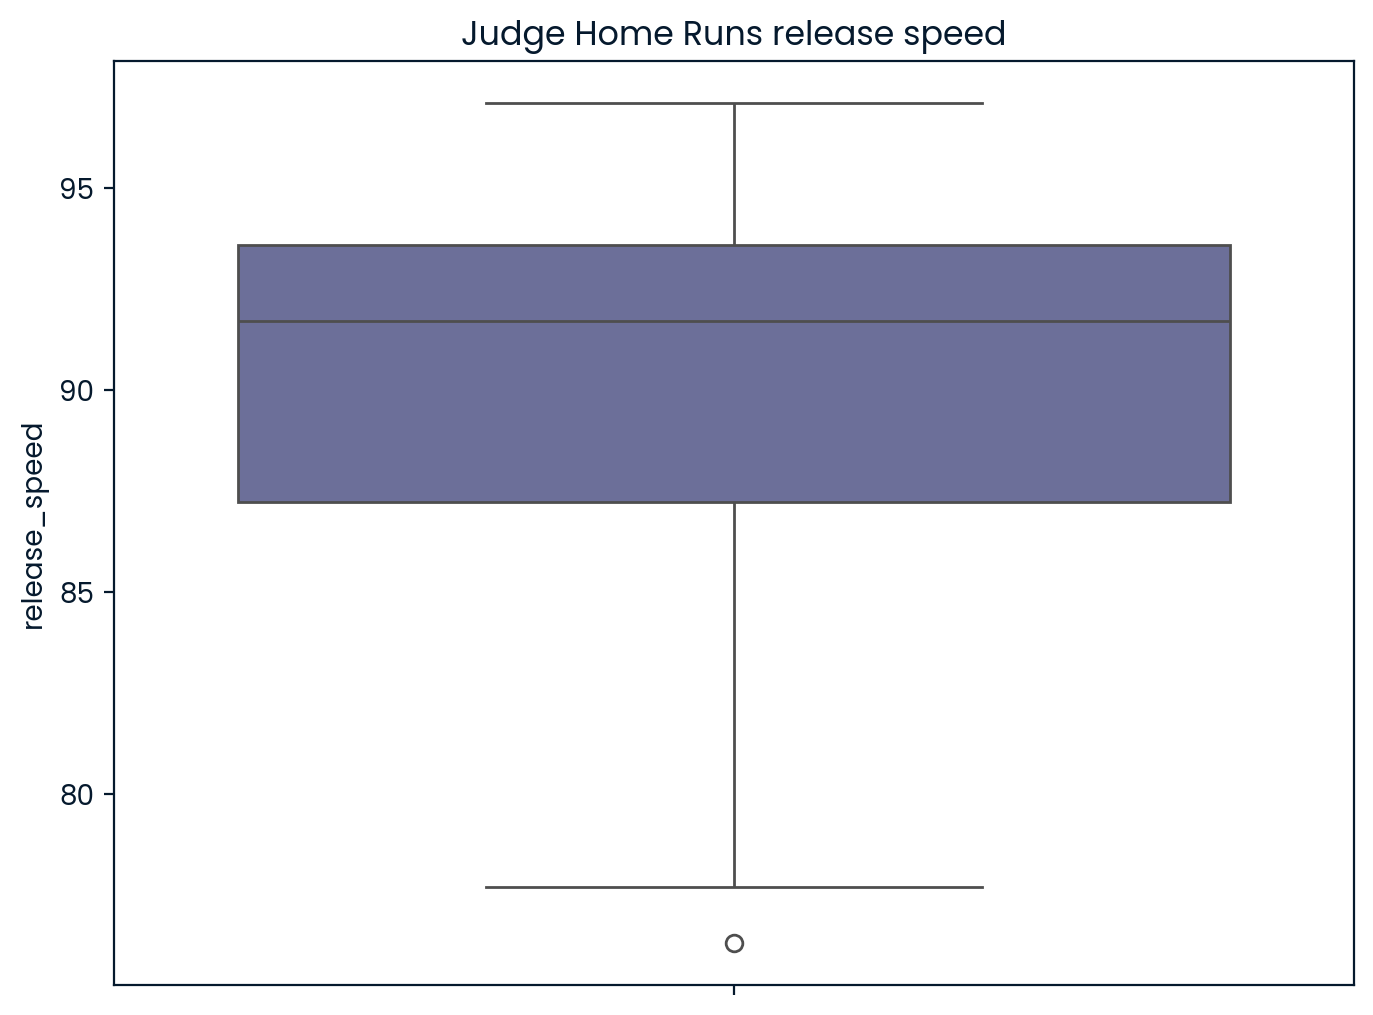

Judge


In [77]:
# Which player hit their home runs off of faster pitches (has the highest median)?
# plot 
fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=stanton[stanton['events']=='home_run'],y="release_speed")
plt.title("Stanton Home Runs release speed")

fig, ax = plt.subplots(figsize=(8,6))
sns.boxplot(data=judge[judge['events']=='home_run'],y="release_speed")
plt.title("Judge Home Runs release speed")

plt.show()

player_fast ="Judge"
print(player_fast)

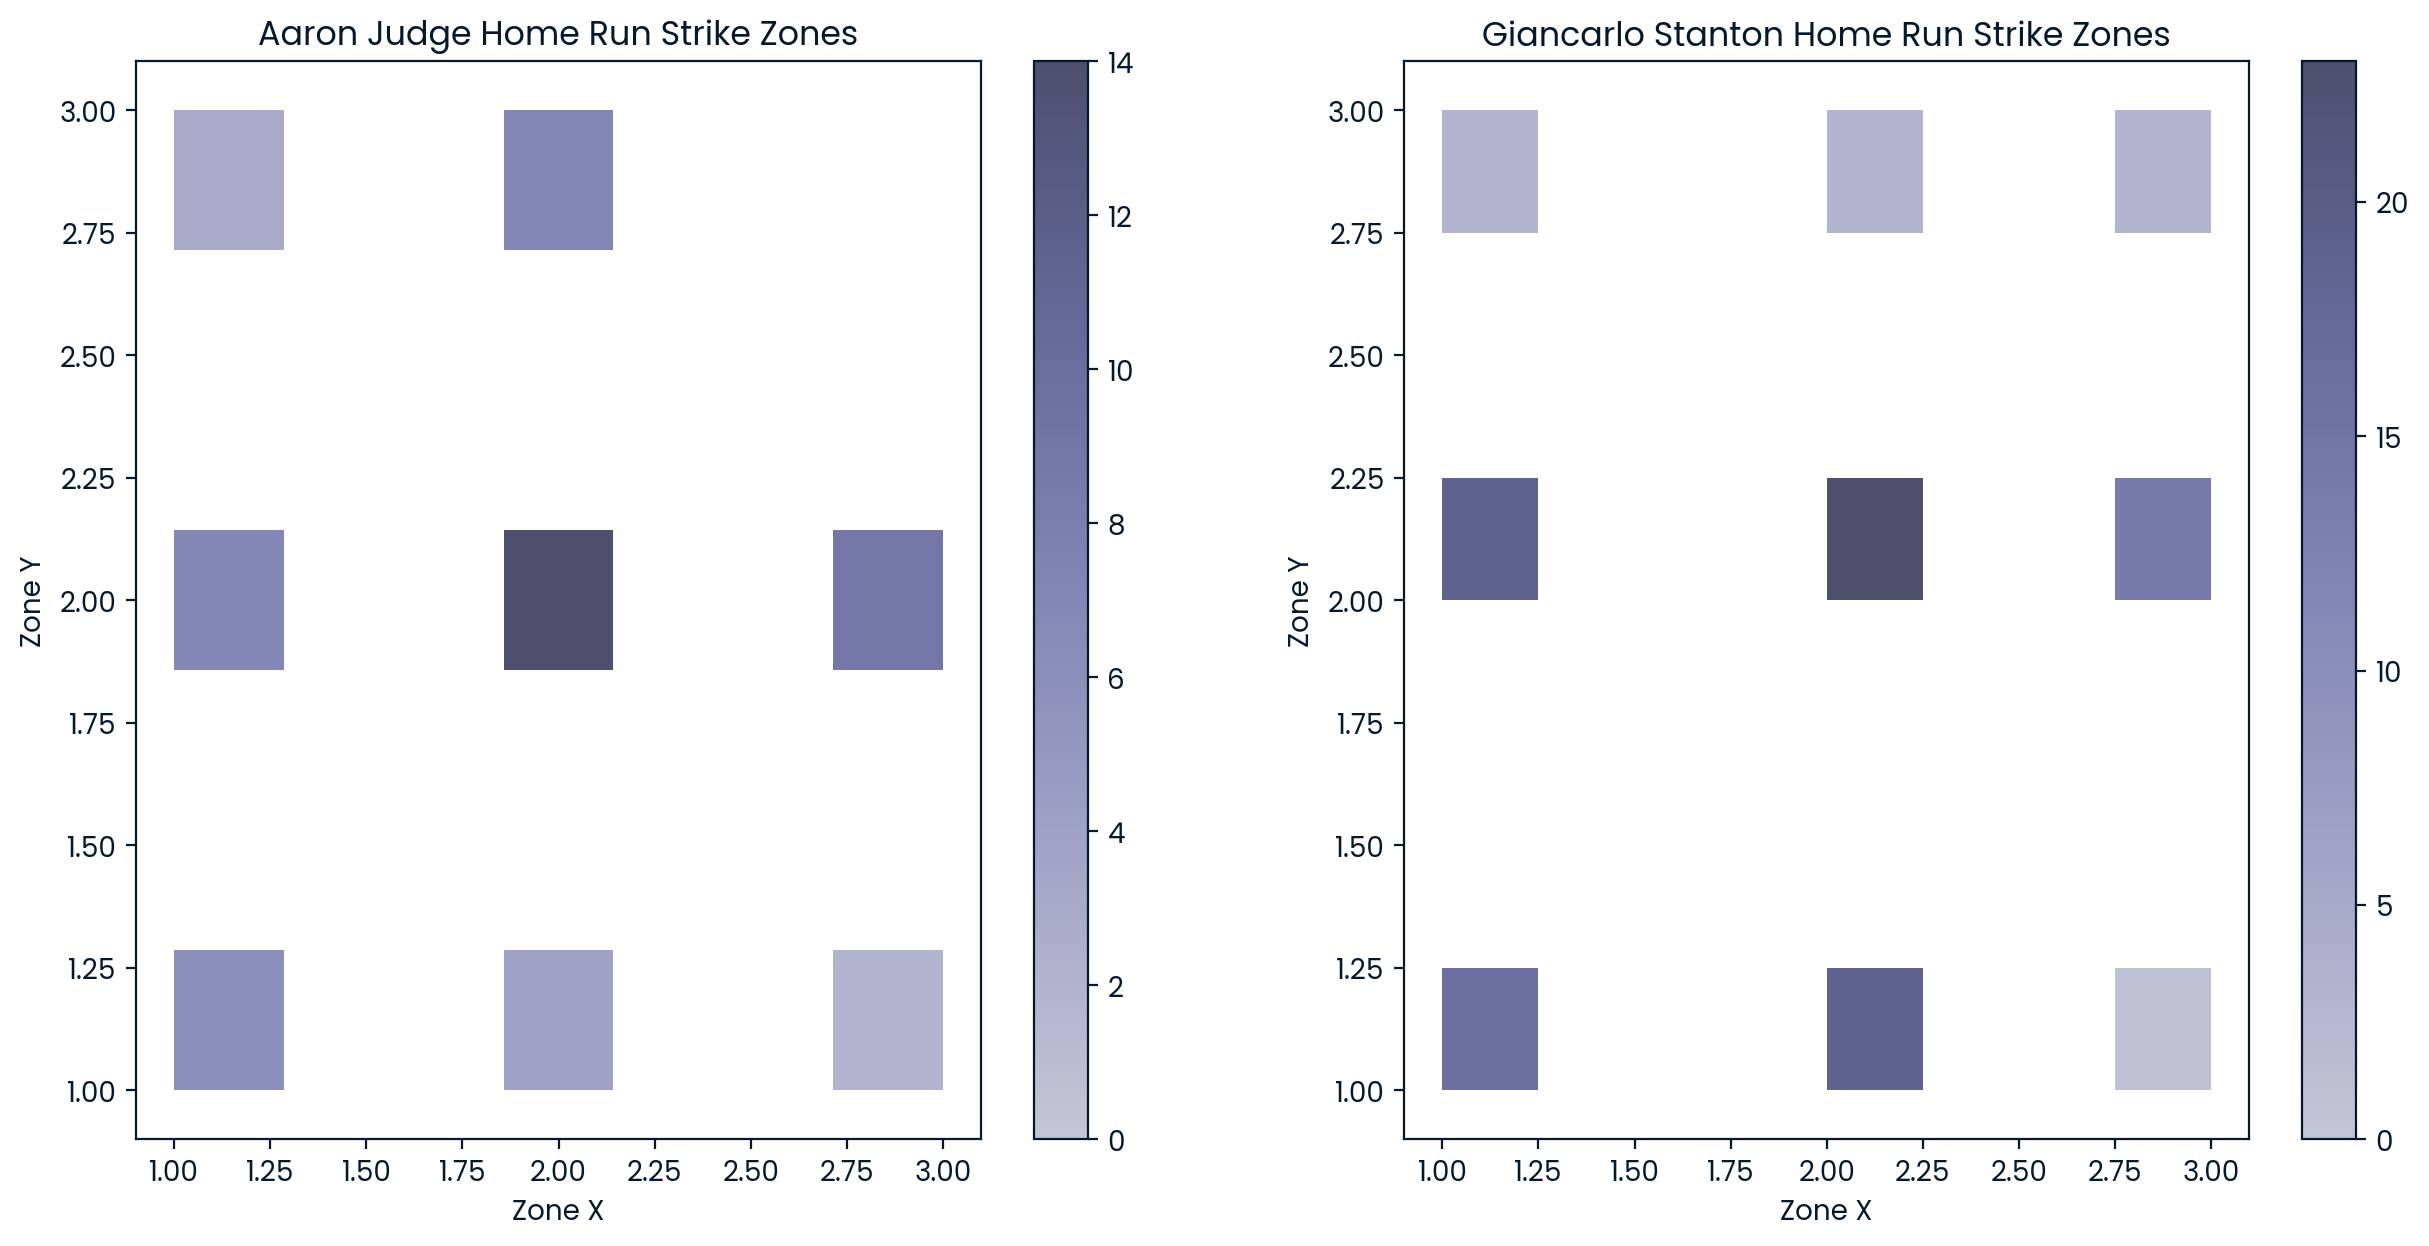

In [78]:
# Construct a 2D histogram for each player that visualizes the home run strike zones, ignoring zones 11, 12, 13, and 14 for simplicity.
judge_strike_hr = judge[(judge['events']=='home_run') & (judge['zone']<=9)]
stanton_strike_hr = stanton[(stanton['events']=='home_run') & (stanton['zone']<=9)]
# assign zones
judge_strike_hr.loc[:,"zone_x"] = judge_strike_hr.apply(assign_x_coord,axis=1)
judge_strike_hr.loc[:,"zone_y"] = judge_strike_hr.apply(assign_y_coord,axis=1)

stanton_strike_hr.loc[:,"zone_x"] = stanton_strike_hr.apply(assign_x_coord,axis=1)
stanton_strike_hr.loc[:,"zone_y"] = stanton_strike_hr.apply(assign_y_coord,axis=1)

# Create plots
fig, axs = plt.subplots(ncols=2, figsize=(15, 7))

sns.histplot(data=judge_strike_hr, x='zone_x', y='zone_y', ax=axs[0], cbar=True)
axs[0].set_title('Aaron Judge Home Run Strike Zones')
axs[0].set_xlabel('Zone X')
axs[0].set_ylabel('Zone Y')

sns.histplot(data=stanton_strike_hr, x='zone_x', y='zone_y', ax=axs[1], cbar=True)
axs[1].set_title('Giancarlo Stanton Home Run Strike Zones')
axs[1].set_xlabel('Zone X')
axs[1].set_ylabel('Zone Y')

plt.show()